In [2]:
import pandas as pd

### Column renaming

In [24]:
df = pd.read_csv('../datasets/fr.csv', header=None)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1506053531,0,0.01298,0.01164,0.01904,0.17794,49420650.0,24710325.0,24710325.0,27200.0,4075.0,200.0,1
1,1506053531,1,0.01283,0.00961,0.01672,0.20868,48201765.0,24100883.0,24100883.0,27200.0,4040.0,160.0,1
2,1506053531,2,0.01268,0.00590,0.01337,0.20442,48211669.0,24105834.0,24105834.0,27200.0,3956.0,170.0,1
3,1506053531,3,0.01129,0.00988,0.01637,0.18453,47423524.0,23711762.0,23711762.0,27200.0,3964.0,158.0,1
4,1506053531,4,0.01169,0.01338,0.01783,0.11478,47778345.0,23889173.0,23889173.0,27200.0,4053.0,163.0,1


In [26]:
df = pd.DataFrame({
    'id': df[0],
    'e_mu_current': df[2],
    'e_mu_estimated': df[3],
    'e_nu_1': df[4],
    'e_nu_2': df[5],
    'q_mu': df[9] / df[6] * 1000,
    'q_nu1': df[10] / df[7] * 1000,
    'q_nu2': df[11] / df[8] * 1000,
})

In [27]:
df.to_csv('../datasets/data.csv', index=False)
df.head(5)

,id,e_mu_current,e_mu_estimated,e_nu_1,e_nu_2,q_mu,q_nu1,q_nu2
0,1506053531,0.01298,0.01164,0.01904,0.17794,0.550377,0.164911,0.008094
1,1506053531,0.01283,0.00961,0.01672,0.20868,0.564295,0.167629,0.006639
2,1506053531,0.01268,0.00590,0.01337,0.20442,0.564179,0.164110,0.007052
3,1506053531,0.01129,0.00988,0.01637,0.18453,0.573555,0.167174,0.006663
4,1506053531,0.01169,0.01338,0.01783,0.11478,0.569296,0.169658,0.006823


### Pivoting

In [40]:
df = pd.read_csv('../datasets/data.csv')
df.head(5)

columns = ['e_mu_current', 'e_mu_estimated', 'e_nu_1', 'e_nu_2', 'q_mu', 'q_nu1', 'q_nu2']
dfs = []

for col in columns:
    df_slice = df[col].reset_index()
    df_slice = df_slice.rename({'index': 'timestamp', col: 'target'}, axis='columns')
    df_slice["segment"] = col
    
    dfs.append(df_slice)

pivoted_df = pd.concat(dfs, ignore_index=True)
pivoted_df.to_csv('../datasets/pivoted_data.csv', index=False)

### EDA

In [54]:
df = pd.read_csv('../datasets/pivoted_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'] * 100, unit='ms')

In [55]:
df

,timestamp,target,segment
0,1970-01-01 00:00:00.000,0.012980,e_mu_current
1,1970-01-01 00:00:00.100,0.012830,e_mu_current
2,1970-01-01 00:00:00.200,0.012680,e_mu_current
3,1970-01-01 00:00:00.300,0.011290,e_mu_current
4,1970-01-01 00:00:00.400,0.011690,e_mu_current
...,...,...,...
1293945,1970-01-01 05:08:04.500,0.008164,q_nu2
1293946,1970-01-01 05:08:04.600,0.007907,q_nu2
1293947,1970-01-01 05:08:04.700,0.007366,q_nu2
1293948,1970-01-01 05:08:04.800,0.007378,q_nu2


In [56]:
from etna.datasets.tsdataset import TSDataset
ready_df = TSDataset.to_dataset(df)
dataset = TSDataset(ready_df, freq='100L')

In [57]:
dataset.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
e_mu_current,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
e_mu_estimated,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
e_nu_1,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
e_nu_2,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
q_mu,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
q_nu1,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L
q_nu2,1970-01-01,1970-01-01 05:08:04.900,184850,0,7,0,0,0,100L


In [58]:
dataset.info()

<class 'etna.datasets.TSDataset'>
num_segments: 7
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: 100L
               start_timestamp           end_timestamp  length  num_missing
segments                                                                   
e_mu_current        1970-01-01 1970-01-01 05:08:04.900  184850            0
e_mu_estimated      1970-01-01 1970-01-01 05:08:04.900  184850            0
e_nu_1              1970-01-01 1970-01-01 05:08:04.900  184850            0
e_nu_2              1970-01-01 1970-01-01 05:08:04.900  184850            0
q_mu                1970-01-01 1970-01-01 05:08:04.900  184850            0
q_nu1               1970-01-01 1970-01-01 05:08:04.900  184850            0
q_nu2               1970-01-01 1970-01-01 05:08:04.900  184850            0


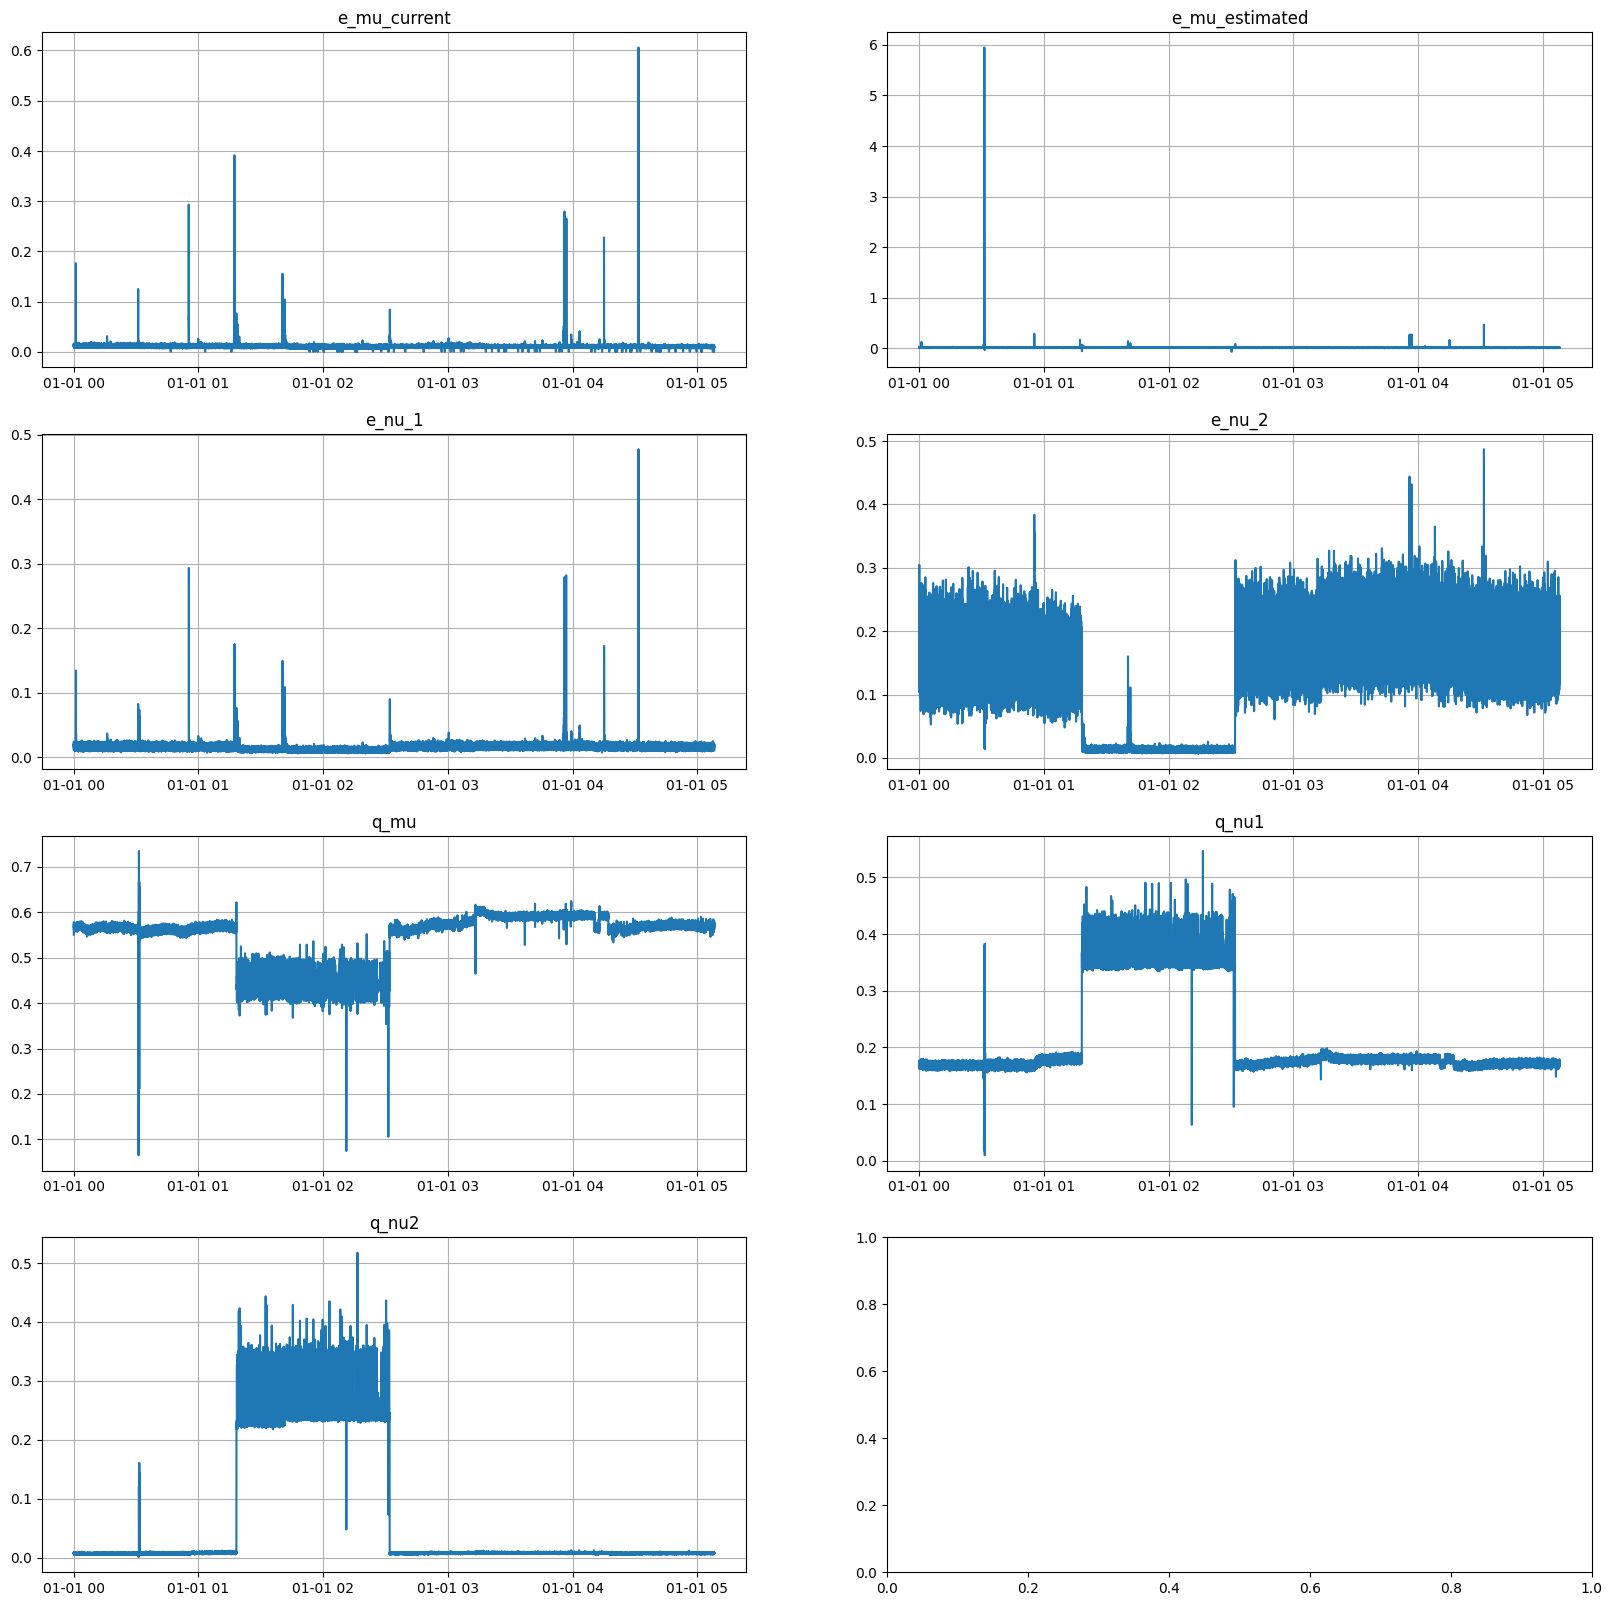

In [65]:
dataset.plot()

### Modelling

In [93]:
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.pipeline import Pipeline
from etna.models import SimpleExpSmoothingModel, NaiveModel
from etna.analysis.plotters import plot_backtest

In [159]:
horizon = 300
model = SimpleExpSmoothingModel(smoothing_level=0.09, initialization_method='known', initial_level=0.01)
transforms = []

In [160]:
pipeline = Pipeline(model=model, transforms=transforms, horizon=horizon)

In [161]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=dataset, metrics=[MAE(), MSE(), SMAPE()])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/qber-forecasting-gdGd_lax-py3.10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:333: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/qber-forecasting-gdGd_lax-py3.10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:333: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/qber-forecasting-gdGd_lax-py3.10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:333: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_job

In [162]:
metrics_df.head(5)

,segment,MAE,MSE,SMAPE,fold_number
2,e_mu_current,0.000980,0.000001,9.784834,0
2,e_mu_current,0.000956,0.000002,9.702814,1
2,e_mu_current,0.001182,0.000002,11.634648,2
2,e_mu_current,0.001094,0.000002,11.296462,3
2,e_mu_current,0.001090,0.000002,11.159785,4


In [163]:
forecast_df.head()

segment                 e_mu_current           e_mu_estimated            \
feature                  fold_number    target    fold_number    target   
timestamp                                                                 
1970-01-01 05:05:35.000            0  0.010111              0  0.008775   
1970-01-01 05:05:35.100            0  0.010111              0  0.008775   
1970-01-01 05:05:35.200            0  0.010111              0  0.008775   
1970-01-01 05:05:35.300            0  0.010111              0  0.008775   
1970-01-01 05:05:35.400            0  0.010111              0  0.008775   

segment                      e_nu_1                e_nu_2            \
feature                 fold_number    target fold_number    target   
timestamp                                                             
1970-01-01 05:05:35.000           0  0.015667           0  0.180127   
1970-01-01 05:05:35.100           0  0.015667           0  0.180127   
1970-01-01 05:05:35.200           0  0.015667           0  0.180127   
1970-01-01 05:05:35.300           0  0.015667           0  0.180127   
1970-01-01 05:05:35.400           0  0.015667           0  0.180127   

segment                        q_mu                 q_nu1            \
feature                 fold_number    target fold_number    target   
timestamp                                                             
1970-01-01 05:05:35.000           0  0.572009           0  0.172351   
1970-01-01 05:05:35.100           0  0.572009           0  0.172351   
1970-01-01 05:05:35.200           0  0.572009           0  0.172351   
1970-01-01 05:05:35.300           0  0.572009           0  0.172351   
1970-01-01 05:05:35.400           0  0.572009           0  0.172351   

segment                       q_nu2            
feature                 fold_number    target  
timestamp                                      
1970-01-01 05:05:35.000           0  0.007746  
1970-01-01 05:05:35.100           0  0.007746  
1970-01-01 05:05:35.200           0  0.007746  
1970-01-01 05:05:35.300           0  0.007746  
1970-01-01 05:05:35.400           0  0.007746

In [164]:
fold_info_df.head()

,train_start_time,train_end_time,test_start_time,test_end_time,fold_number
0,1970-01-01,1970-01-01 05:05:34.900,1970-01-01 05:05:35,1970-01-01 05:06:04.900,0
0,1970-01-01,1970-01-01 05:06:04.900,1970-01-01 05:06:05,1970-01-01 05:06:34.900,1
0,1970-01-01,1970-01-01 05:06:34.900,1970-01-01 05:06:35,1970-01-01 05:07:04.900,2
0,1970-01-01,1970-01-01 05:07:04.900,1970-01-01 05:07:05,1970-01-01 05:07:34.900,3
0,1970-01-01,1970-01-01 05:07:34.900,1970-01-01 05:07:35,1970-01-01 05:08:04.900,4


In [239]:
from etna.transforms import LagTransform, LogTransform
from etna.models import CatBoostMultiSegmentModel

In [240]:
train_ts, test_ts = dataset.train_test_split(
    train_start="1970-01-01 00:00:00",
    train_end="1970-01-01 04:00:00",
    test_start="1970-01-01 04:00:01",
    test_end="1970-01-01 04:00:30",
)

horizon = 300

In [241]:
lags = LagTransform(in_column="target", lags=list(range(100, 500, 25)))
transforms = [lags]
train_ts.fit_transform(transforms)

model = CatBoostMultiSegmentModel()
model.fit(train_ts)

CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = None, )

In [242]:
future_ts = train_ts.make_future(future_steps=horizon)
forecast_ts = model.forecast(future_ts)
forecast_ts.inverse_transform()

/Users/rmnigm/Library/Caches/pypoetry/virtualenvs/qber-forecasting-gdGd_lax-py3.10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:333: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [244]:
import etna.metrics

etna.metrics.SMAPE()(y_true=test_ts, y_pred=forecast_ts)

{'e_mu_estimated': 25.858591415083538,
 'q_nu1': 118.76192256552507,
 'e_mu_current': 15.099255195523419,
 'e_nu_2': 112.01381461181393,
 'q_mu': 75.15577165266137,
 'e_nu_1': 28.887961143221492,
 'q_nu2': 8.071836441482816}

In [245]:
etna.metrics.MAPE()(y_true=test_ts, y_pred=forecast_ts)

{'e_mu_estimated': 33.02676468101629,
 'q_nu1': 62.74892572862082,
 'e_mu_current': 15.042999332782575,
 'e_nu_2': 63.87791838956352,
 'q_mu': 47.16954138921869,
 'e_nu_1': 24.14527645974894,
 'q_nu2': 8.473751151034332}

In [246]:
etna.metrics.MSE()(y_true=test_ts, y_pred=forecast_ts)

{'e_mu_estimated': 9.904617288608467e-06,
 'q_nu1': 0.01903162877719061,
 'e_mu_current': 3.828437833111135e-06,
 'e_nu_2': 0.021652224878244926,
 'q_mu': 0.12113217495545262,
 'e_nu_1': 2.499975423684284e-05,
 'q_nu2': 6.763980397620515e-07}

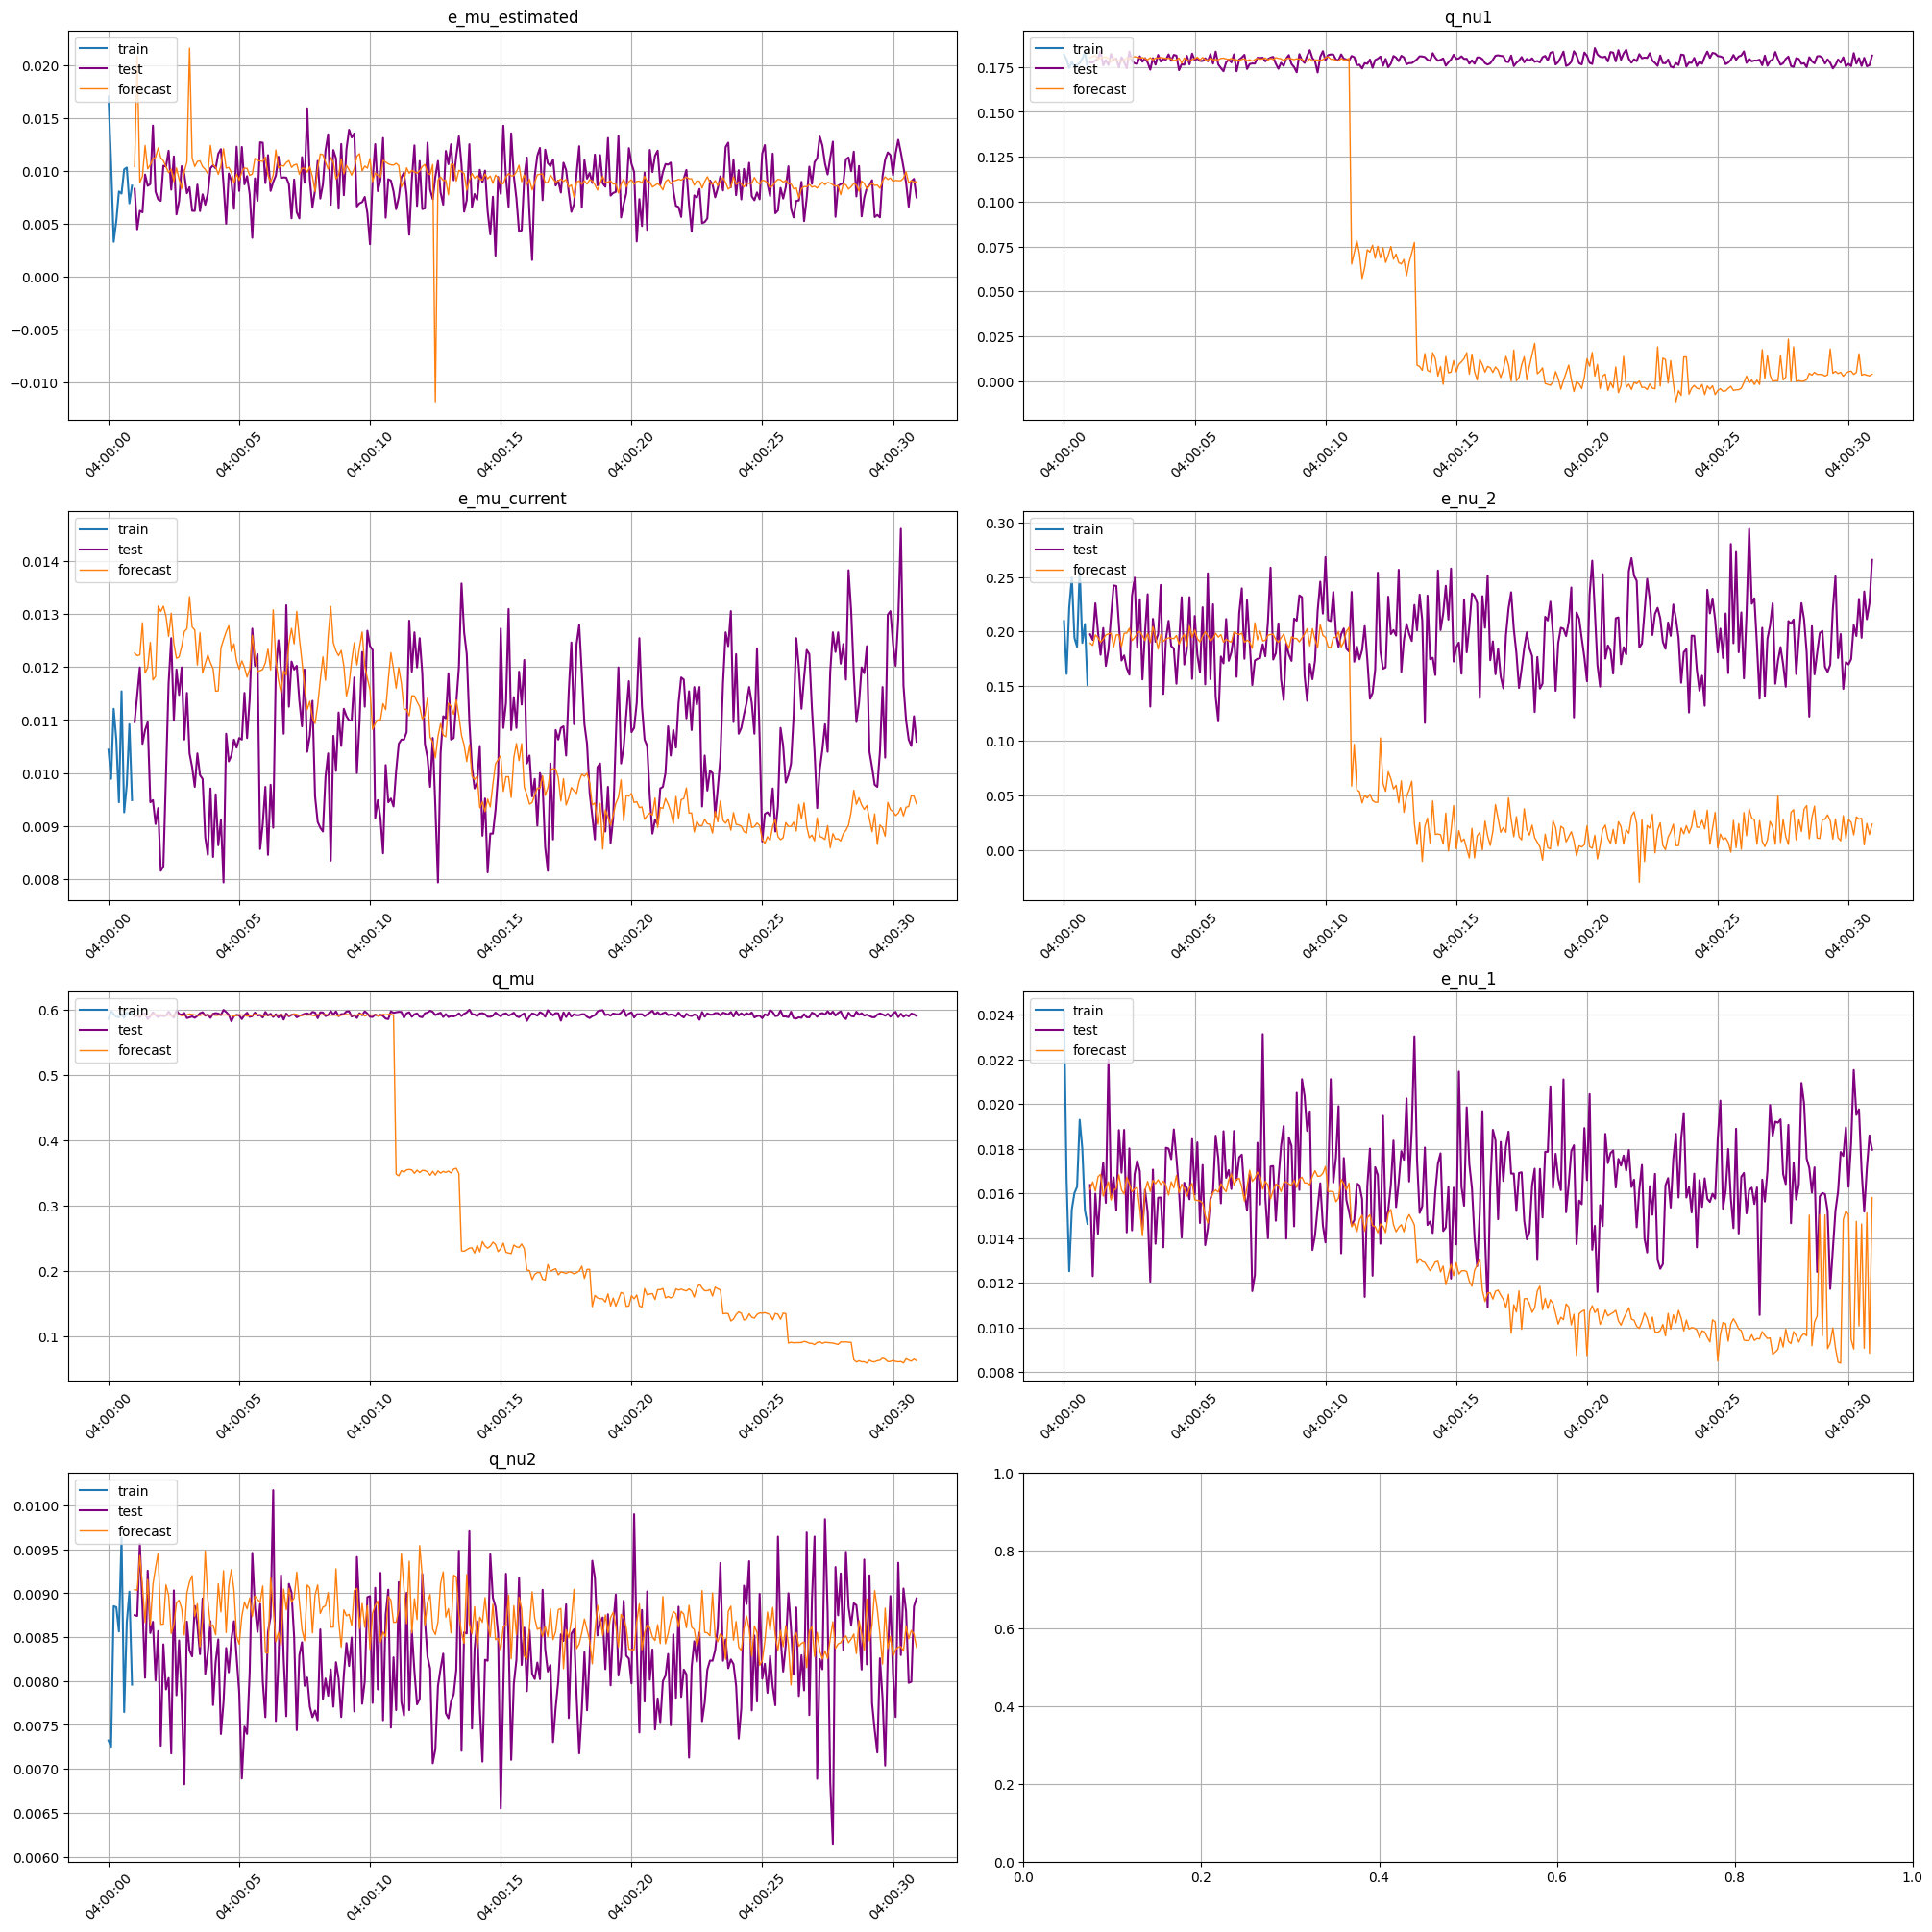

In [247]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)